## Target Marketing

### Abstract:
In this project, we develop a targeted marketing model for SMARTMARKET to optimize campaign response rates by targeting only 25% of its subscriber base starting from week 27. Over six months, SMARTMARKET has launched ten different campaigns to its entire subscriber base. Our approach integrates exploratory data analysis (EDA) to decipher subscriber behaviors and responses, thorough data preparation to enhance data integrity, and investigative analysis to identify the most responsive subscribers and effective campaigns. The outcomes will inform future campaign strategies, focusing on maximizing response rates while reducing costs.

### Introduction:
SMARTMARKET operates extensive email marketing campaigns, delivering weekly messages to its entire subscriber base. Due to escalating costs, the company plans to reduce the number of emails sent starting week 27. This project focuses on analyzing historical campaign data to identify which subscribers should receive campaigns and which campaigns should be prioritized to maintain high response rates within the reduced volume constraint. This involves statistical analysis and predictive modeling based on subscriber demographics, campaign response history, and other relevant data.

### Data Source:
- Data source: https://drive.google.com/drive/folders/1O_GVTVmiwV3kQtv1gMybo9vR4-89pKK9?usp=drive_link

### Data Summary:
- week_number: Relates to the week the campaign was delivered (1-26). The data type is categorical ordinal.
- subscriber_id:Uniquely identifies the subscriber. The data type is ordinal categorical.
- user_category: Category for the user based on several demographic criteria (A,B,C,D). The data type is Ordinal Categorical.
- state_id: Code that identifies the state where subscriber is located (150). The data type is Ordinal categorical
- gender:Gender of the subscriber (M,F). The data type is Regular Categorical.
- campaign_id: Uniquely identifies the campaign. The data type is 
- response: Identifies if a user responded to the campaign (0,1)Questions. The data type is categorical ordinal.

### Research Approach:
- Data Acquisation: Acquire the data from source.
- Data Summary: Review the dataset to understand the data type of each attribute.
- Exploratory Data Analysis (EDA): Conducting initial data exploration to understand patterns in campaign responses and subscriber demographics.

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


### Data Loading:

In [2]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the data from Github
data = pd.read_csv("https://raw.githubusercontent.com/Venkatalakshmikottapalli/AIM-5001/main/hist.csv", header = None)
# Print the dataset
data.head()

,0,1,2,3,4,5,6
0,1,1,B,2,M,1,1
1,1,2,A,38,F,2,0
2,1,3,C,46,M,3,0
3,1,4,B,35,M,4,0
4,1,5,B,22,M,5,1


In [4]:
# Add column names to the dataset
data.columns = ['week_number', 'subscriber_id', 'user_category', 'state_id', 'gender', 'campaign_id', 'response']
# Print the dataset
data.head(5)

,week_number,subscriber_id,user_category,state_id,gender,campaign_id,response
0,1,1,B,2,M,1,1
1,1,2,A,38,F,2,0
2,1,3,C,46,M,3,0
3,1,4,B,35,M,4,0
4,1,5,B,22,M,5,1


### Use Cases:

In [5]:
# lets check the use cases of data
data.shape

(260000, 7)

### checking for nulls:

In [6]:
# check for nulls in attributes
data.columns[data.isnull().any()]

Index([], dtype='object')

In [7]:
# display the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260000 entries, 0 to 259999
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   week_number    260000 non-null  int64 
 1   subscriber_id  260000 non-null  int64 
 2   user_category  260000 non-null  object
 3   state_id       260000 non-null  int64 
 4   gender         260000 non-null  object
 5   campaign_id    260000 non-null  int64 
 6   response       260000 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 13.9+ MB


#### Comment:
- Checked for nulls and missing values. Based on the results above, the dataset does not contain any nulls or missing values. At this point, the number of use cases for the analysis and for all attributes is still the same at 260000.

### Checking for invalid values:

In [8]:
# check gender column for invalid values
data['gender'].unique()

array(['M', 'F'], dtype=object)

In [9]:
# Check user_category column for in valid values
data['user_category'].unique()

array(['B', 'A', 'C', 'D'], dtype=object)

### Exploratory Data Analysis

In [10]:
# Summary statistics of data
data.describe()

,week_number,subscriber_id,state_id,campaign_id,response
count,260000.000000,260000.000000,260000.000000,260000.000000,260000.000000
mean,13.500000,5211.700000,25.293800,5.500000,0.424454
std,7.500014,3307.146485,14.425272,2.872287,0.494261
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,7.000000,2500.750000,13.000000,3.000000,0.000000
50%,13.500000,5000.500000,25.000000,5.500000,0.000000
75%,20.000000,7500.250000,38.000000,8.000000,1.000000
max,26.000000,13200.000000,50.000000,10.000000,1.000000


In [11]:
# summary statistics for week number
data['week_number'].describe()

count    260000.000000
mean         13.500000
std           7.500014
min           1.000000
25%           7.000000
50%          13.500000
75%          20.000000
max          26.000000
Name: week_number, dtype: float64

C:\Users\venka\AppData\Local\Temp\ipykernel_13128\3768688327.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='week_number', data=data, palette='Set2')


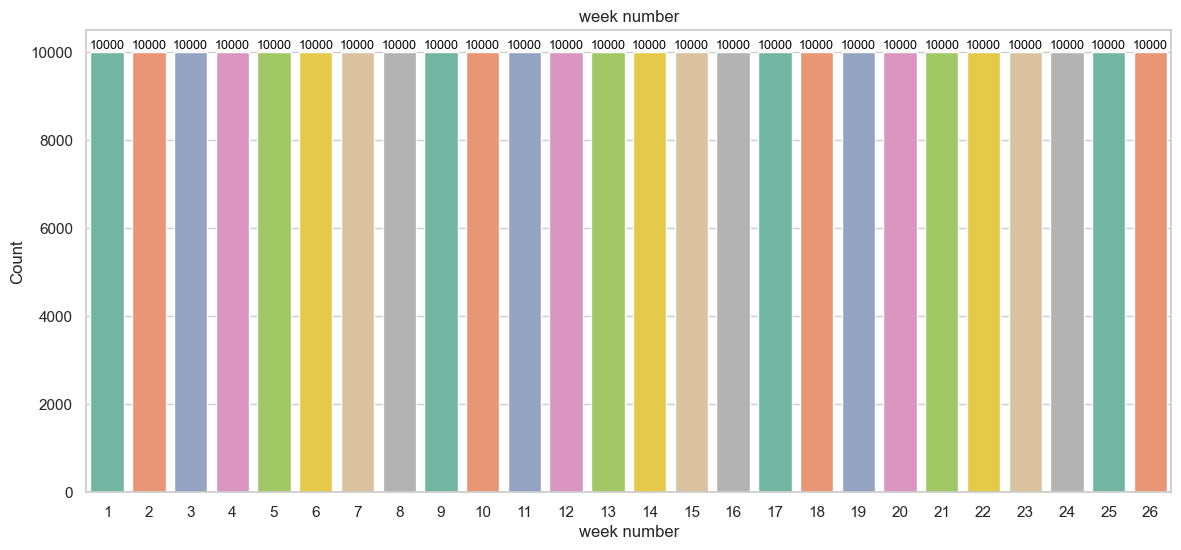

In [12]:
# Set up the visualization environment
sns.set(style="whitegrid")

# Plotting user_category using Seaborn
plt.figure(figsize=(14, 6))
ax = sns.countplot(x='week_number', data=data, palette='Set2')
plt.title('week number')
plt.xlabel('week number')
plt.ylabel('Count')

# Adding count labels on top of each bar using `text`
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',
            ha='center', va='bottom', color='black', fontsize=9)

plt.show()

In [13]:
# summary statistics for subscriber id
data['subscriber_id'].describe()

count    260000.000000
mean       5211.700000
std        3307.146485
min           1.000000
25%        2500.750000
50%        5000.500000
75%        7500.250000
max       13200.000000
Name: subscriber_id, dtype: float64

### User Category:

In [14]:
# summary statistics for user category
data['user_category'].describe()

count     260000
unique         4
top            B
freq       77116
Name: user_category, dtype: object

C:\Users\venka\AppData\Local\Temp\ipykernel_13128\2813715830.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='user_category', data=data, palette='Set2')


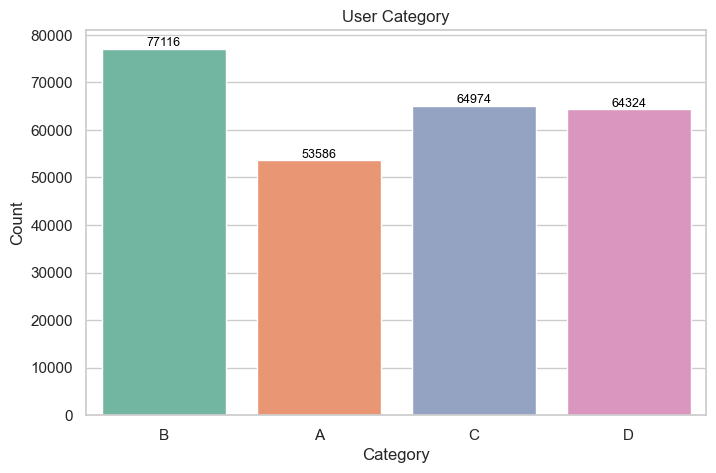

In [15]:
# Set up the visualization environment
sns.set(style="whitegrid")

# Plotting user_category using Seaborn
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='user_category', data=data, palette='Set2')
plt.title('User Category')
plt.xlabel('Category')
plt.ylabel('Count')

# Adding count labels on top of each bar using `text`
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',
            ha='center', va='bottom', color='black', fontsize=9)

plt.show()

#### Comment:
- Category B has the highest number of users (77,116), suggesting it's the dominant segment in the user base.
- Category A has the lowest number of users (53,586), indicating it might be a underdeveloped segment.
- Categories C and D have similar user counts (64,974 and 64,324, respectively), suggesting balanced attention in terms of marketing and resource allocation.
- The distribution suggests that marketing strategies should prioritize Category B, while potentially developing targeted approaches to grow Category A or further engage users in Categories C and D.

### State Id:

In [16]:
# summary statistics for state id
data['state_id'].describe()

count    260000.000000
mean         25.293800
std          14.425272
min           1.000000
25%          13.000000
50%          25.000000
75%          38.000000
max          50.000000
Name: state_id, dtype: float64

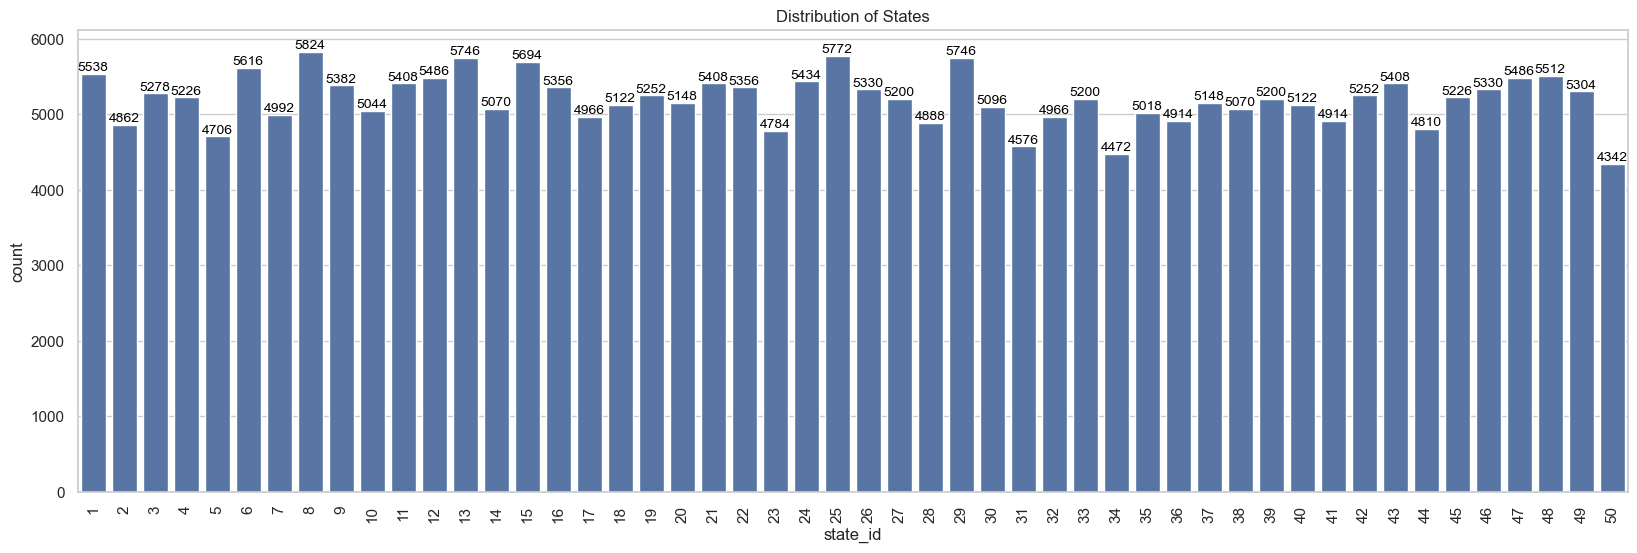

In [17]:
# Set up the visualization environment
sns.set(style="whitegrid")

# Count Plot for States
plt.figure(figsize=(20, 6))
ax = sns.countplot(x='state_id', data=data, order=sorted(data['state_id'].unique()))
plt.title('Distribution of States')
plt.xticks(rotation=90) 

# Adding count labels on top of each bar using `text`
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',
            ha='center', va='bottom', color='black', fontsize=10)

plt.show()

#### Comment:
- Uniform Distribution: The distribution across states is relatively uniform, with most states having counts around 4,000 to 6,000. This suggests a balanced representation of data points across different states.
- Slight Variations: While the distribution is generally uniform, there are slight variations:
- Higher Counts: Some states (e.g., states 8, 13, 25, 29, 6, 15, and 21) have slightly higher counts, approaching or exceeding 5,500.
- Lower Counts: A few states (e.g., states 2, 5, 31, 34, 44 and 50) have lower counts, closer to or below 4,500.

### Gender:

In [18]:
# summary statistics for gender
data['gender'].describe()

count     260000
unique         2
top            F
freq      143182
Name: gender, dtype: object

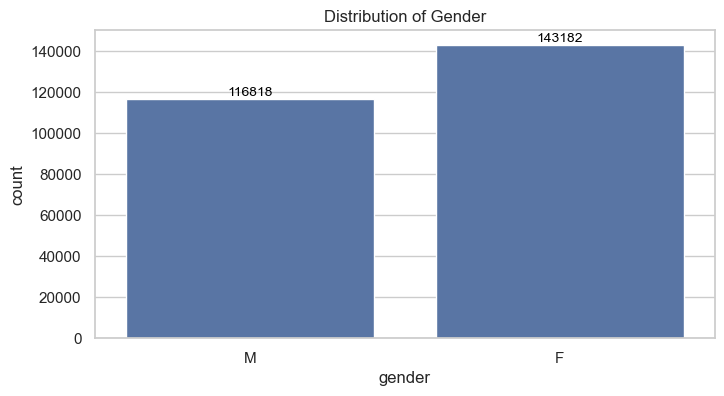

In [19]:
# Set up the visualization environment
sns.set(style="whitegrid")

# Count Plot for Gender
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='gender', data=data)
plt.title('Distribution of Gender')

# Adding count labels on top of each bar using `text`
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',
            ha='center', va='bottom', color='black', fontsize=10)

plt.show()

#### Comment:
- There are 116,818 individuals identified as male.
- There are 143,182 individuals identified as female.
- Female Dominance: There are more females (143,182) than males (116,818) in the dataset, indicating a gender skew towards females.
- Implications for Targeting: This skew suggests a potential focus on female-oriented marketing strategies or product offerings, given their numerical superiority.

In [20]:
# summary statistics for campaign id
data['campaign_id'].describe()

count    260000.000000
mean          5.500000
std           2.872287
min           1.000000
25%           3.000000
50%           5.500000
75%           8.000000
max          10.000000
Name: campaign_id, dtype: float64

C:\Users\venka\AppData\Local\Temp\ipykernel_13128\1256147058.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='campaign_id', data=data, palette='Set2')


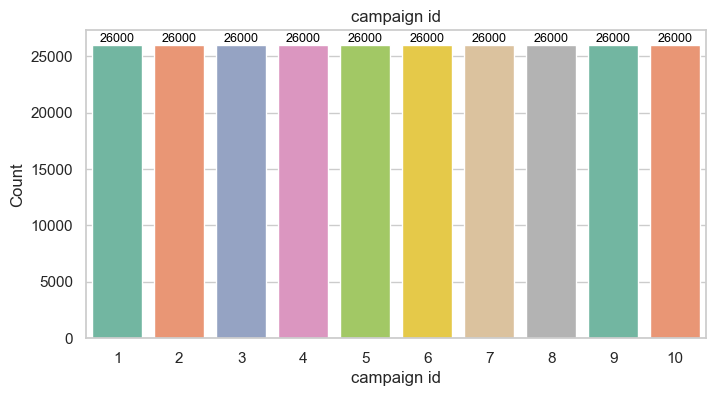

In [21]:
# Set up the visualization environment
sns.set(style="whitegrid")

# Plotting user_category using Seaborn
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='campaign_id', data=data, palette='Set2')
plt.title('campaign id')
plt.xlabel('campaign id')
plt.ylabel('Count')

# Adding count labels on top of each bar using `text`
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',
            ha='center', va='bottom', color='black', fontsize=9)

plt.show()

#### Comment:
- Uniform Campaign Distribution: Each of the 10 campaigns (campaign_ids 1-10) has exactly 26,000 records, indicating uniform data collection across all campaigns.

### Response:

In [22]:
# summary statistics for response
data['response'].describe()

count    260000.000000
mean          0.424454
std           0.494261
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: response, dtype: float64

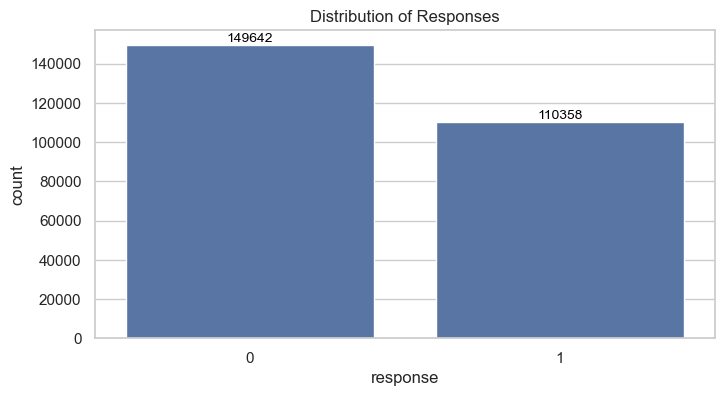

In [23]:
# Set up the visualization environment
sns.set(style="whitegrid")

# Histogram of Response
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='response', data=data)
plt.title('Distribution of Responses')

# Adding count labels on top of each bar using `text`
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',
            ha='center', va='bottom', color='black', fontsize=10)

plt.show()

#### Comment:
- There are 149,642 instances where no response was recorded (0).
- There are 110,358 instances where a response was recorded (1).
- Majority Non-responsive: The majority of individuals (149,642) did not respond, compared to 110,358 who did.
- Response Rate: The response rate is approximately 42.5%, indicating that less than half of the targeted individuals engaged with the action or query measured

### Bivarite Analysis:

#### response and gender:

In [24]:
# Response rate by gender
response_by_gender = data.groupby('gender')['response'].mean()
print(response_by_gender)

gender
F    0.496745
M    0.335847
Name: response, dtype: float64


<Axes: xlabel='gender'>

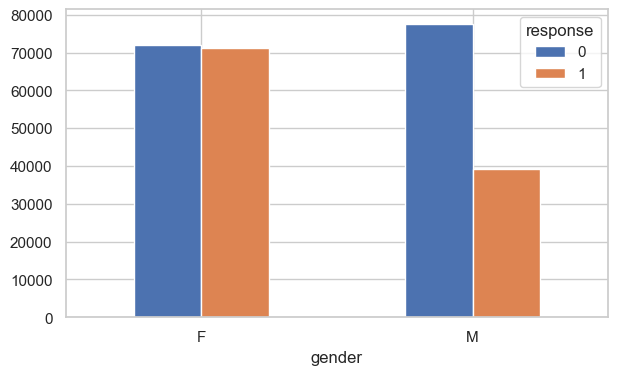

In [25]:
#response and gender:
response_and_gender=pd.crosstab(index=data['gender'],columns=data['response'])
response_and_gender.plot.bar(figsize=(7,4), rot=0)

#### Comment:
- Higher Positive Response Rate in Females: Females (F) show a higher count of positive responses (response = 1) compared to males (M).
- Balanced Responses for Females: Female responses are relatively balanced between positive and negative, with a slight tilt towards positive.
- More Negative Responses in Males: Males have significantly more negative responses (response = 0) than positive.
- Targeting Strategy: Focus more on targeting female subscribers for campaigns, as they have a higher positive response rate. Further investigate to improve male engagement.

#### response and user category:

In [26]:
# Response rate by user category
response_by_category = data.groupby('user_category')['response'].mean()
print(response_by_category)

user_category
A    0.556955
B    0.210021
C    0.654000
D    0.339282
Name: response, dtype: float64


<Axes: xlabel='user_category'>

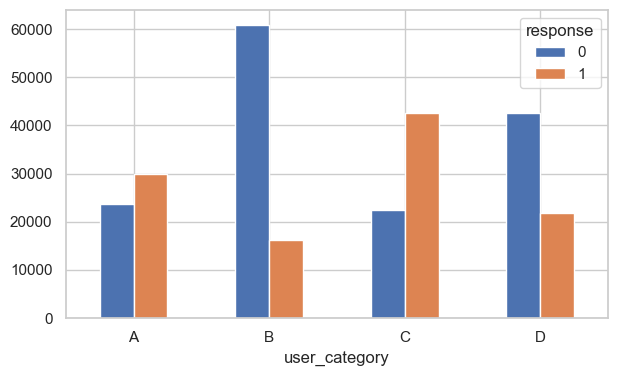

In [27]:
# response and user_category:
response_and_user_category=pd.crosstab(index=data['user_category'],columns=data['response'])
response_and_user_category.plot.bar(figsize=(7,4), rot=0)

#### Comment:
- High Positive Responses in Category A and C: Categories A and C have a higher count of positive responses (response = 1) compared to negative responses (response = 0).
- Low Positive Responses in Category B: Category B has a significantly higher count of negative responses (response = 0) compared to positive responses.
- Balanced Responses in Category D: Category D shows a relatively balanced count of positive and negative responses, with a slight tilt towards negative responses.
- Targeting Strategy: Focus email campaigns on subscribers in categories A and C, as they show higher positive response rates.
- Re-evaluate the approach for category B, as the negative response rate is notably higher.

#### Response and State

In [28]:
# Response rate by state
response_by_state = data.groupby('state_id')['response'].mean()
print(response_by_state)

state_id
1     0.405200
2     0.447552
3     0.409246
4     0.423651
5     0.423289
6     0.444444
7     0.426282
8     0.422562
9     0.427350
10    0.432990
11    0.414016
12    0.433102
13    0.410721
14    0.432544
15    0.406568
16    0.458551
17    0.461337
18    0.419367
19    0.380427
20    0.420357
21    0.431398
22    0.421957
23    0.386915
24    0.421605
25    0.424116
26    0.439775
27    0.417308
28    0.442308
29    0.401671
30    0.409929
31    0.411932
32    0.445228
33    0.442115
34    0.438506
35    0.425668
36    0.425315
37    0.436869
38    0.403156
39    0.400577
40    0.433229
41    0.417786
42    0.415270
43    0.438979
44    0.419751
45    0.435706
46    0.443340
47    0.427816
48    0.422351
49    0.401961
50    0.450484
Name: response, dtype: float64


<Axes: xlabel='state_id'>

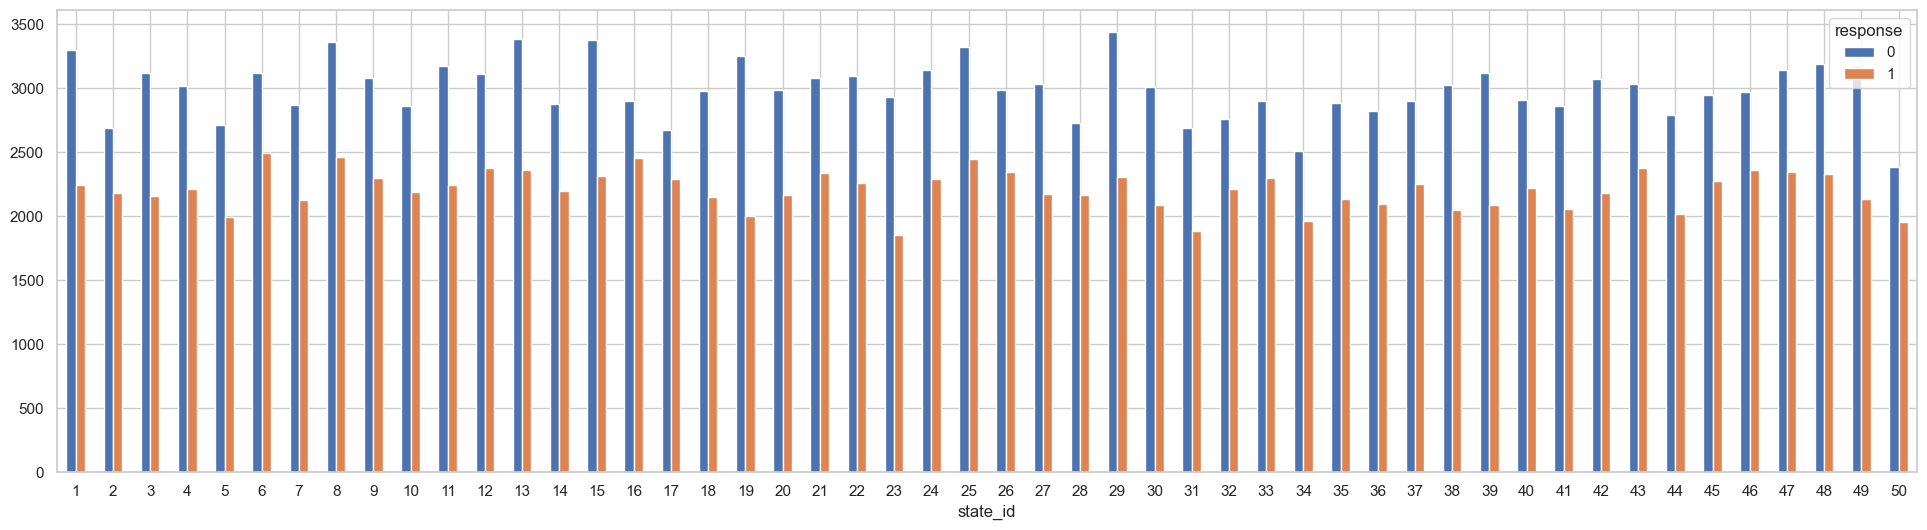

In [29]:
# Response and State
response_and_state=pd.crosstab(index=data['state_id'],columns=data['response'])
response_and_state.plot.bar(figsize=(24,6), rot=0)

#### Comment:
- Consistent Positive Responses: The positive responses (response = 1) are fairly consistent across most state IDs, indicating a steady engagement level.
- Variation in Negative Responses: There is noticeable variation in the negative responses (response = 0) across different state IDs, with some states showing higher counts of negative responses.
- Notable States: State IDs like 1, 8, 13, 15, 19, 25, 29, 48 and 49 show relatively higher counts of positive responses.
- States with higher negative responses might require different or improved campaign strategies to enhance engagement.
- Response Rate Analysis: The provided response rates (ranging from 0.380 to 0.461) indicate that most states have a response rate around 40-45%, with some states like 16 and 17 showing higher response rates around 45-46%.
- Targeting Strategy: 
- Focus on States with Higher Positive Responses: Prioritize email campaigns for states like 1, 5, 7, 10, 16, 24, 29, and 50.
- Investigate Low Engagement States: Explore reasons for lower engagement in states with higher negative responses to improve overall campaign effectiveness.

#### Response and campaign

In [30]:
# Response rate by campaign
response_by_campaign = data.groupby('campaign_id')['response'].mean()
print(response_by_campaign)

campaign_id
1     0.492077
2     0.420385
3     0.328846
4     0.501846
5     0.374538
6     0.490038
7     0.488308
8     0.310731
9     0.361962
10    0.475808
Name: response, dtype: float64


<Axes: xlabel='campaign_id'>

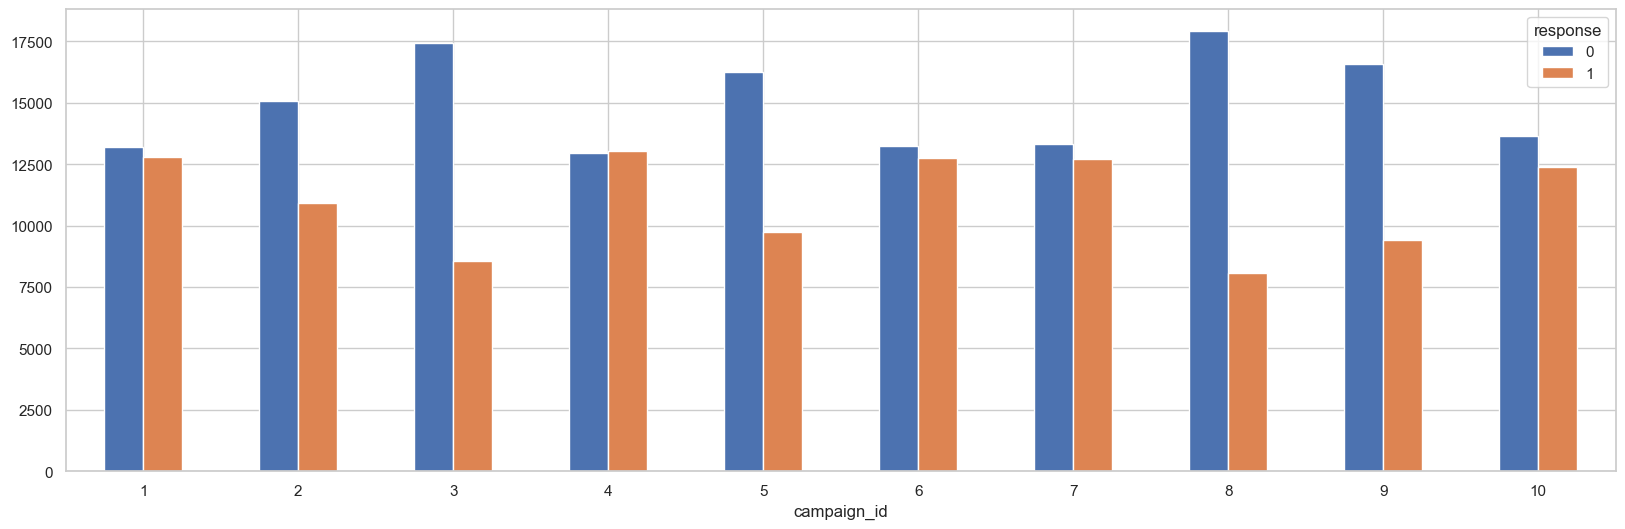

In [31]:
# Response and campaign
response_and_campaign =pd.crosstab(index=data['campaign_id'],columns=data['response'])
response_and_campaign.plot.bar(figsize=(20,6), rot=0)

#### Comment:
- High Positive Responses in Campaigns 1, 4, 6, 7, and 10:
- Campaigns 1, 4, 6, 7, and 10 have a relatively balanced number of positive (response = 1) and negative (response = 0) responses.
- Low Positive Responses in Campaigns 3, 5, 8, and 9:
- Campaigns 3, 5, 8, and 9 show a significantly higher count of negative responses compared to positive responses.
- Campaign Performance:
- Campaign 8 has the highest number of negative responses, indicating poor performance in engagement.
- Campaigns 1, 4, 6, 7, and 10 are more effective with a higher proportion of positive responses.
- Targeting Strategy:
- Focus on Effective Campaigns: Continue and expand campaigns 1, 4, 6, 7, and 10, as they show better engagement.
- Re-evaluate Underperforming Campaigns: Investigate and revise strategies for campaigns 3, 5, 8, and 9 to improve their effectiveness.

#### Response and week number

In [32]:
# Response rate by week number
response_by_week = data.groupby('week_number')['response'].mean()
print(response_by_week)

week_number
1     0.3009
2     0.2887
3     0.3271
4     0.3137
5     0.3256
6     0.3271
7     0.3281
8     0.3225
9     0.3241
10    0.3259
11    0.3870
12    0.3850
13    0.4041
14    0.4858
15    0.4849
16    0.4809
17    0.4944
18    0.4894
19    0.4860
20    0.4909
21    0.5108
22    0.5163
23    0.5238
24    0.5740
25    0.5675
26    0.5713
Name: response, dtype: float64


<Axes: xlabel='week_number'>

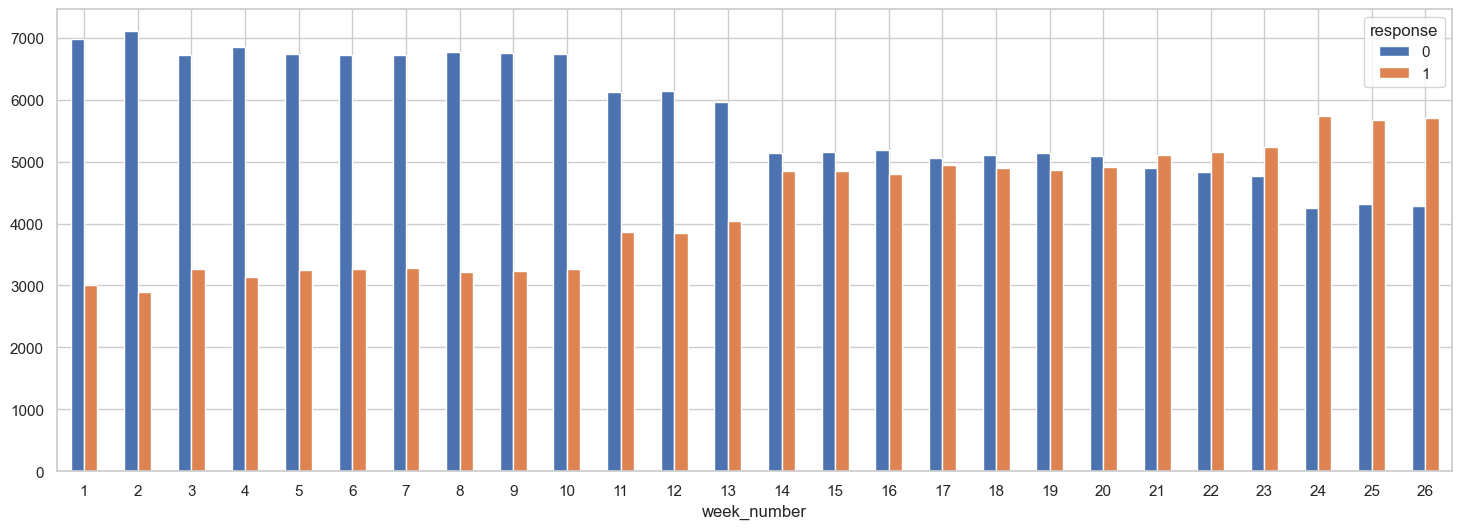

In [33]:
# Response and week number
response_and_week =pd.crosstab(index=data['week_number'],columns=data['response'])
response_and_week .plot.bar(figsize=(18,6), rot=0)

#### Comment:
- High Negative Responses in Early Weeks:
- Weeks 1 to 13 have a significantly higher count of negative responses (response = 0) compared to positive responses.
- Increasing Positive Responses in Later Weeks:
- From week 14 onwards, the number of positive responses (response = 1) steadily increases, overtaking negative responses around week 18.
- Weeks 24 to 26 show a notably higher count of positive responses compared to negative responses.
- Engagement Trends:
- Engagement appears to improve over time, with more positive responses in the later weeks.
- Targeting Strategy:
- Focus on Later Weeks: Campaigns scheduled in the later weeks (especially weeks 24 to 26) are more likely to receive positive responses.
- Analyze Early Weeks: Investigate factors contributing to lower engagement in the early weeks to improve future campaign effectiveness.

#### Response and subscriber Id

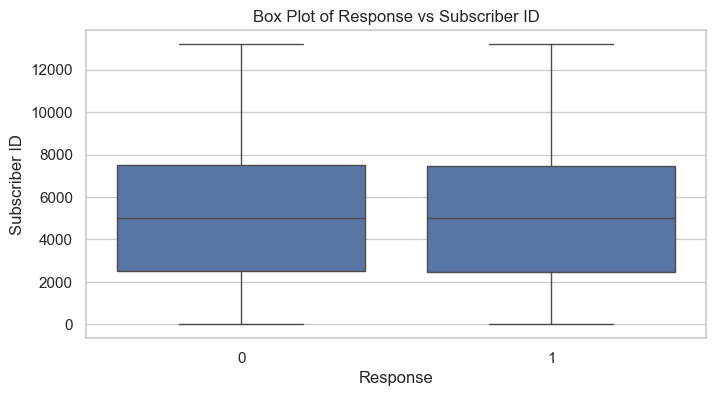

In [34]:
# Box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x='response', y='subscriber_id', data=data)
plt.xlabel('Response')
plt.ylabel('Subscriber ID')
plt.title('Box Plot of Response vs Subscriber ID')
plt.show()

#### Comment:
- Response Category 0:
- The median subscriber_id is around 5000.
- The IQR for subscriber_id ranges from around 2000 to 7500.
- The whiskers extend from approximately 0 to 12000, indicating the spread of subscriber_id values for response = 0.
- Response Category 1:
- The median subscriber_id is also around 5000.
- The IQR for subscriber_id ranges from around 2000 to 7500.
- The whiskers extend from approximately 0 to 12000, indicating the spread of subscriber_id values for response = 1.
- Similar Distributions: The distributions of subscriber_id values for both response categories (0 and 1) are quite similar. Both have a median around 4000 and a similar IQR.

### Multi variate Analysis:

C:\Users\venka\AppData\Local\Temp\ipykernel_13128\1799471035.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Campaign ID', y='Average Response', hue='User Category', data=response_analysis, ci=None)


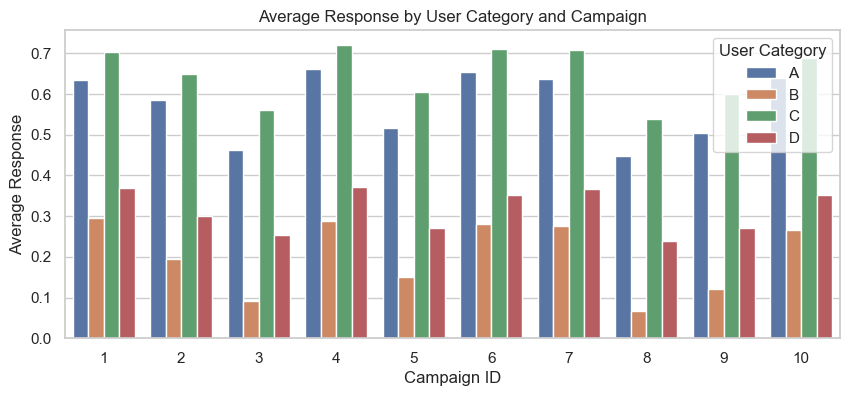

In [35]:
# Group by user_category, gender, and campaign_id, then calculate the mean response
response_analysis = data.groupby(['user_category', 'gender', 'campaign_id'])['response'].mean().reset_index()

# Rename columns for better understanding
response_analysis.columns = ['User Category', 'Gender', 'Campaign ID', 'Average Response']

# Plot the bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Campaign ID', y='Average Response', hue='User Category', data=response_analysis, ci=None)
plt.title('Average Response by User Category and Campaign')
plt.xlabel('Campaign ID')
plt.ylabel('Average Response')
plt.legend(title='User Category')
plt.show()

#### Comment:
- From this plot we can observe that A and C categories have a better response rate than other categories and majority is more in 1,4,6,7 and 10 campaigns.

C:\Users\venka\AppData\Local\Temp\ipykernel_13128\2302572251.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Campaign ID', y='Average Response', hue='Gender', data=response_analysis, ci=None)


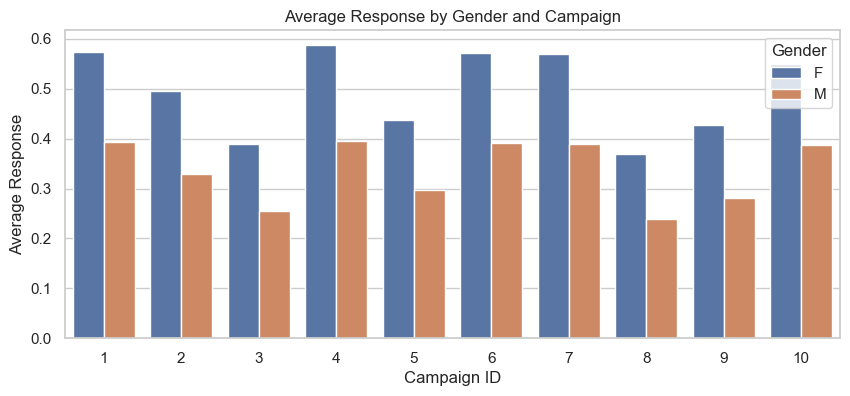

In [36]:
# Group by gender and campaign_id, then calculate the mean response
response_analysis = data.groupby(['gender', 'campaign_id'])['response'].mean().reset_index()

# Rename columns for better understanding
response_analysis.columns = ['Gender', 'Campaign ID', 'Average Response']

# Plot the bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Campaign ID', y='Average Response', hue='Gender', data=response_analysis, ci=None)
plt.title('Average Response by Gender and Campaign')
plt.xlabel('Campaign ID')
plt.ylabel('Average Response')
plt.legend(title='Gender')
plt.show()

#### Comment:
- From this plot we can observe that Females have good response rate than males in every campaign and majority is more in 1,4,6,7 and 10 campaigns.

In [37]:
# Calculate the overall response rate
response_rate = data['response'].mean()

# Top categories and campaigns based on response rate
top_categories = response_by_category[response_by_category > response_rate].index
top_campaigns = response_by_campaign[response_by_campaign > response_rate].index

# Filter subscribers based on top categories and campaigns
subscribers_to_email = data[(data['user_category'].isin(top_categories)) & (data['campaign_id'].isin(top_campaigns))]

# expected response rate
expected_response_rate = subscribers_to_email['response'].mean()
print(f"Expected response rate for the targeted campaigns: {expected_response_rate:.2%}")
print('top_campaigns', top_campaigns)

Expected response rate for the targeted campaigns: 67.47%
top_campaigns Index([1, 4, 6, 7, 10], dtype='int64', name='campaign_id')


#### Comment:
- First, it calculates the average response rate from a dataset.
- It then identifies categories and campaigns that have response rates higher than the overall average calculated in step 1. This helps identify which categories and campaigns historically perform better in terms of eliciting responses.
- Using the categories and campaigns identified as high-performing in step 2, the code filters the dataset to select subscribers associated with these categories and campaigns. This step aims to target subscribers who are more likely to respond based on past performance.
- After filtering, it calculates the average response rate among the selected subscribers. This provides an estimate of the expected response rate for targeted email campaigns directed at these specific subscribers and campaigns.
- Lastly, it prints out the list of campaigns that have response rates higher than the overall average.

### Answers for the question based on the analysis:
- (1) Which subscribers would you send email to?
- A. Send emails to subscribers who fall into Category A and Category C. Specifically target females located in states known for higher historical response rates. These states include: 1, 8, 13, 15, 25, and 29.
- (2) Which campaign(s) would you deliver to them?
- A. Deliver the following campaigns: 1, 4, 6, 7, and 10, as these have demonstrated higher positive response rates previously. Avoid Campaign 8 due to lower performance. Consider adjustments for Campaigns 3, 5, and 9 based on their past performance.
- (3) What do you expect the response rate to be?
- A. The expected response rate can vary significantly based on several factors such as the campaign content, timing of delivery, and the specific demographics of the targeted subscribers. However, tentatively anticipating a response rate around 67.47% based mathematical calculation.


### Feature Engineering

In [38]:
df = pd.DataFrame(data)

# Calculate FRQ_W_n
def calculate_frq(df, n):
    frq = df.groupby('subscriber_id')['response'].rolling(window=n, min_periods=1).sum().reset_index(0, drop=True)
    return frq

df['FRQ_W_2'] = calculate_frq(df, 2)
df['FRQ_W_3'] = calculate_frq(df, 3)
df['FRQ_W_4'] = calculate_frq(df, 4)
df['FRQ_W_5'] = calculate_frq(df, 5)

# Calculate LIFE_TIME_RESPONSE_RATE
df['LIFE_TIME_RESPONSE_RATE'] = df.groupby('subscriber_id')['response'].expanding().mean().reset_index(level=0, drop=True).apply(lambda x: f"{x:.1%}")

# Calculate LAST_CAMPAIGN and LAST_2ND_CAMPAIGN
df['LAST_CAMPAIGN'] = df.groupby('subscriber_id')['campaign_id'].shift(1)
df['LAST_2ND_CAMPAIGN'] = df.groupby('subscriber_id')['campaign_id'].shift(2)

# Calculate IS_LAST_A_RESPONSE
df['IS_LAST_A_RESPONSE'] = df.groupby('subscriber_id')['response'].shift(1).fillna(0).astype(int)

# Calculate WEEK_SINCE_LAST_RESPONSE
def weeks_since_last_response(group):
    last_response_week = group['week_number'].where(group['response'] != 0).ffill().shift(1).fillna(0).astype(int)
    group['WEEK_SINCE_LAST_RESPONSE'] = group['week_number'] - last_response_week
    group['WEEK_SINCE_LAST_RESPONSE'] = group['WEEK_SINCE_LAST_RESPONSE'].apply(lambda x: max(0, x))
    return group

df = df.groupby('subscriber_id').apply(weeks_since_last_response).reset_index(drop=True)

C:\Users\venka\AppData\Local\Temp\ipykernel_13128\2008332426.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('subscriber_id').apply(weeks_since_last_response).reset_index(drop=True)


#### Comment:
- It calculates how often subscribers responded over 2 to 5-week periods (FRQ_W_2 to FRQ_W_5).
- Computes the average response rate over time for each subscriber (LIFE_TIME_RESPONSE_RATE).
- Tracks previous campaign IDs (LAST_CAMPAIGN and LAST_2ND_CAMPAIGN) for analysis.
- Determines if subscribers responded in the previous week (IS_LAST_A_RESPONSE).
- Calculates how many weeks have passed since each subscriber's last response (WEEK_SINCE_LAST_RESPONSE).

In [39]:
df.columns

Index(['week_number', 'subscriber_id', 'user_category', 'state_id', 'gender',
       'campaign_id', 'response', 'FRQ_W_2', 'FRQ_W_3', 'FRQ_W_4', 'FRQ_W_5',
       'LIFE_TIME_RESPONSE_RATE', 'LAST_CAMPAIGN', 'LAST_2ND_CAMPAIGN',
       'IS_LAST_A_RESPONSE', 'WEEK_SINCE_LAST_RESPONSE'],
      dtype='object')

### Scaling

In [40]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Ensure LIFE_TIME_RESPONSE_RATE is treated as string
df['LIFE_TIME_RESPONSE_RATE'] = df['LIFE_TIME_RESPONSE_RATE'].astype(str).str.rstrip('%').astype('float') / 100.0

# Label encoding for categorical features
label_encoders = {}
for column in ['user_category', 'state_id', 'gender', 'campaign_id']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Impute missing values with SimpleImputer
imputer = SimpleImputer(strategy='mean')
df[['LAST_CAMPAIGN', 'LAST_2ND_CAMPAIGN']] = imputer.fit_transform(df[['LAST_CAMPAIGN', 'LAST_2ND_CAMPAIGN']])

# Feature scaling with StandardScaler
scaler = StandardScaler()
df[['FRQ_W_2', 'FRQ_W_3', 'FRQ_W_4', 'FRQ_W_5', 'LIFE_TIME_RESPONSE_RATE', 'LAST_CAMPAIGN', 'LAST_2ND_CAMPAIGN', 'WEEK_SINCE_LAST_RESPONSE']] = scaler.fit_transform(
    df[['FRQ_W_2', 'FRQ_W_3', 'FRQ_W_4', 'FRQ_W_5', 'LIFE_TIME_RESPONSE_RATE', 'LAST_CAMPAIGN', 'LAST_2ND_CAMPAIGN', 'WEEK_SINCE_LAST_RESPONSE']]
)

# Display the processed dataframe
df.head()

,week_number,subscriber_id,user_category,state_id,gender,campaign_id,response,FRQ_W_2,FRQ_W_3,FRQ_W_4,FRQ_W_5,LIFE_TIME_RESPONSE_RATE,LAST_CAMPAIGN,LAST_2ND_CAMPAIGN,IS_LAST_A_RESPONSE,WEEK_SINCE_LAST_RESPONSE
0,1,1,1,1,1,0,1,0.223050,-0.195748,-0.425852,-0.567798,2.429957,0.000000,0.000000,0,-0.574526
1,2,1,1,1,1,1,0,0.223050,-0.195748,-0.425852,-0.567798,0.557197,-1.597726,0.000000,1,-0.574526
2,3,1,1,1,1,2,0,-1.065767,-0.195748,-0.425852,-0.567798,-0.068305,-1.242676,-1.630672,0,-0.349240
3,4,1,1,1,1,3,0,-1.065767,-1.138711,-0.425852,-0.567798,-0.379183,-0.887625,-1.268300,0,-0.123954
4,5,1,1,1,1,4,0,-1.065767,-1.138711,-1.178022,-0.567798,-0.566459,-0.532575,-0.905929,0,0.101332


#### Comment:
- Processing LIFE_TIME_RESPONSE_RATE:
- Converts the LIFE_TIME_RESPONSE_RATE column from percentage strings (like '34.5%') to floating-point numbers (0.345) by stripping the '%' sign and dividing by 100.
- Label Encoding for Categorical Features:
- Encodes categorical features (user_category, state_id, gender, campaign_id) into numerical labels using LabelEncoder from sklearn.preprocessing.
- Imputing Missing Values:
- Fills missing values in LAST_CAMPAIGN and LAST_2ND_CAMPAIGN columns with their respective means using SimpleImputer from sklearn.impute.
- Feature Scaling with StandardScaler:
- Standardizes numerical features (FRQ_W_2, FRQ_W_3, ..., WEEK_SINCE_LAST_RESPONSE) using StandardScaler from sklearn.preprocessing.
- Displayed the dataframe

### Model

In [41]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define your features (X) and target (y)
X = df[['week_number', 'subscriber_id', 'user_category', 'state_id', 'gender',
       'campaign_id', 'FRQ_W_2', 'FRQ_W_3', 'FRQ_W_4', 'FRQ_W_5',
       'LIFE_TIME_RESPONSE_RATE', 'LAST_CAMPAIGN', 'LAST_2ND_CAMPAIGN',
       'IS_LAST_A_RESPONSE', 'WEEK_SINCE_LAST_RESPONSE']]
y = df['response']

# Split the data into training (weeks 1-23) and testing (weeks 24 onwards)
X_train = X[X['week_number'] <= 23].drop(columns=['week_number'])
y_train = y[X['week_number'] <= 23]

X_test = X[X['week_number'] > 23].drop(columns=['week_number'])
y_test = y[X['week_number'] > 23]

# Initialize and train the Gradient Boosting model
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

#### Comment:
- Imports necessary libraries for model training, evaluation, and metrics calculation.
- Defines features (X) and target (y) from the DataFrame df for machine learning.
- Splits the data into training (weeks 1-23) and testing (weeks 24 onwards) datasets based on week_number.
- Initializes and trains a Gradient Boosting model using GradientBoostingClassifier.
- Makes predictions on the testing set (X_test).
- Evaluates the model by calculating accuracy, generating a confusion matrix, and producing a classification report.

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
# training data up to week 26
train = df[df['week_number'].isin(range(1, 27))]  

# Define features and target variable
features = ['user_category', 'state_id', 'gender', 'campaign_id', 'FRQ_W_2', 'FRQ_W_3', 'FRQ_W_4', 'FRQ_W_5',
            'LIFE_TIME_RESPONSE_RATE', 'LAST_CAMPAIGN', 'LAST_2ND_CAMPAIGN', 'IS_LAST_A_RESPONSE',
            'WEEK_SINCE_LAST_RESPONSE']
X_train = train[features]
y_train = train['response']

# Initialize and train Gradient Boosting model
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Predict probabilities for all subscribers in your dataset
df['GB_Tree_Score'] = model.predict_proba(df[features])[:, 1]

# Group by subscriber_id and select best campaign for each based on highest GB_Tree_Score
best_campaigns_df = df.loc[df.groupby('subscriber_id')['GB_Tree_Score'].idxmax()][['subscriber_id', 'campaign_id', 'GB_Tree_Score']]

# Output the results
print("Best Campaigns and GB_Tree_Score for Subscribers:")
best_campaigns_df


Best Campaigns and GB_Tree_Score for Subscribers:


,subscriber_id,campaign_id,GB_Tree_Score
0,1,0,0.999975
27,2,2,0.999975
53,3,3,0.999975
85,4,0,0.999975
104,5,4,0.999975
...,...,...,...
259871,13196,6,0.999975
259899,13197,9,0.999975
259925,13198,0,0.999975
259948,13199,8,0.999975


#### Comment:
- Selects training data (train) up to week 26 based on week_number.
- Defines features (features) and target variable (response) for training the Gradient Boosting model.
- Initializes and trains a Gradient Boosting Classifier (GradientBoostingClassifier) using the defined features (X_train) and target (y_train).
- Predicts probabilities (predict_proba) of responses for all subscribers in the dataset (df) using the trained model.
- Identifies the best campaign (best_campaigns_df) for each subscriber based on the highest predicted probability (GB_Tree_Score).
- Outputs the best campaigns and their corresponding GB_Tree_Score for subscribers.